Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# from keras.datasets import boston_housing

# (x_train, y_train), (x_test, y_test) = boston_housing.load_data()

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [25]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
df.shape

(506, 14)

In [27]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [28]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [30]:
y 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [ ]:
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense

# def build_model():

#     input_layer = Input(shape=(x_train.shape[1],))
#     x = Dense(64, activation='relu')(input_layer)
#     x = Dense(64, activation='relu')(x)
#     output_layer = Dense(1)(x)

#     model = keras.Model(inputs = input_layer, outputs = output_layer)
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#     return model

# model = build_model()


In [42]:
x_train.shape


(379, 13)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model= Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\Plont\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9693 - mae: 0.6282 - val_loss: 11.5290 - val_mae: 2.5836
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1351 - mae: 0.6794 - val_loss: 11.1492 - val_mae: 2.5276
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3305 - mae: 0.7577 - val_loss: 12.1730 - val_mae: 2.6578
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2339 - mae: 0.7453 - val_loss: 11.2863 - val_mae: 2.5513
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3338 - mae: 0.7359 - val_loss: 12.1770 - val_mae: 2.6847
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5198 - mae: 0.8519 - val_loss: 10.9917 - val_mae: 2.4798
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5707 - mae: 0.8577 - val_loss: 10.8055 - val_mae: 2.4738
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1123 - mae: 0.7350 - val_loss: 12.0990 - val_mae: 2.6686
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [51]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1826 - mae: 2.7200 


In [52]:
test_loss, test_mae

(14.5919828414917, 2.635646104812622)

In [53]:
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 14.5920, Test MAE: 2.6356


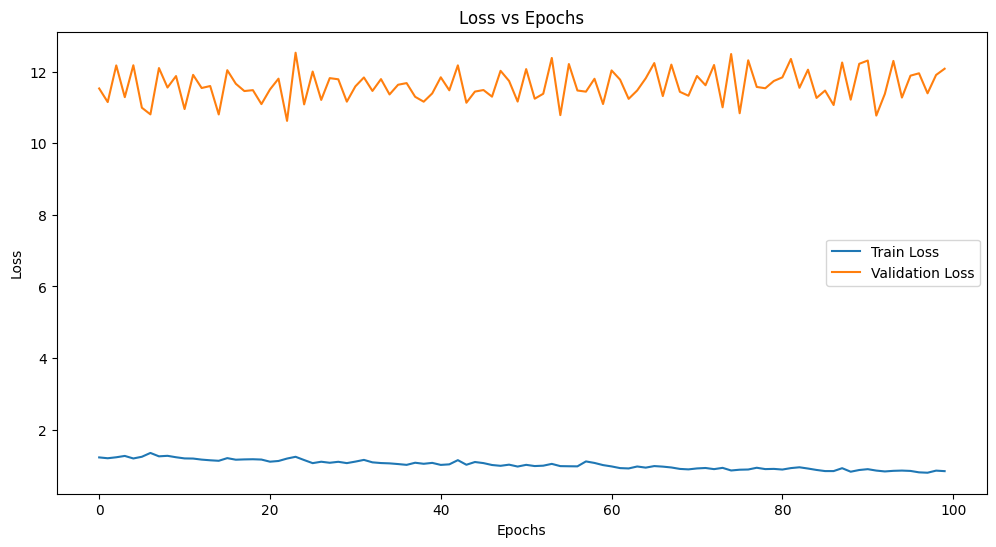

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y = model.predict(x_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y.flatten()})
comparison_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Actual,Predicted
173,23.6,24.284475
274,32.4,39.713089
491,13.6,17.348070
72,22.8,25.115309
452,16.1,16.906116
...,...,...
418,8.8,7.001477
117,19.2,18.906717
42,25.3,24.736914
322,20.4,21.060282


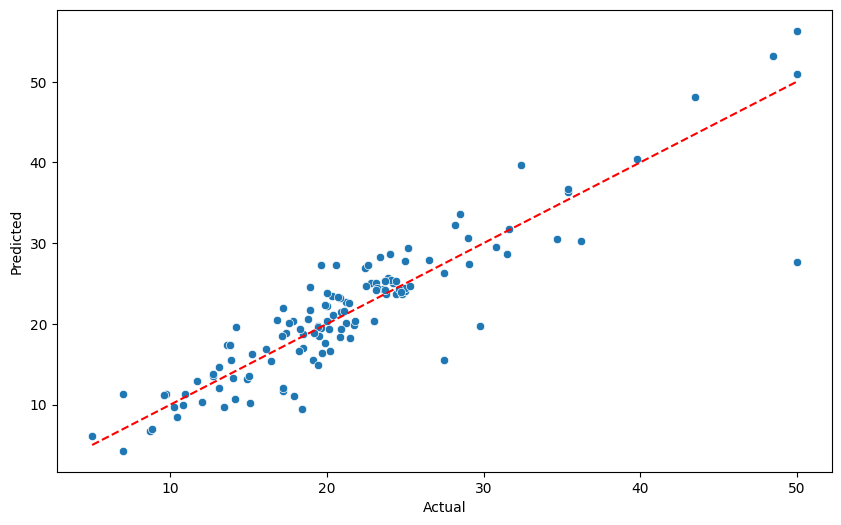

In [66]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Predicted'])
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')